In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

In [2]:
# Provided data
data = pd.read_csv('Production.csv')

# Create DataFrame from the provided data
df = pd.DataFrame(data)


In [3]:
df.head()

,Company,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
0,NFL,34.0,32.1,36.3,36.4,38.0,38.1,38.0,38.6,37.3,38.0
1,RCF,21.1,23.4,23.5,26.0,25.5,25.5,25.0,23.8,23.5,22.5
2,MFL,4.9,4.4,4.9,3.3,4.1,4.7,4.2,3.9,3.5,4.8
3,BVFCL,2.8,3.9,3.1,3.6,3.2,3.1,2.7,2.9,1.6,1.3
4,IFFCO,44.9,45.1,43.8,41.3,46.7,43.3,41.1,45.6,48.7,46.8


In [4]:
df.tail()

,Company,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
18,Narmada Bio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,KanpurFert,0.0,0.0,3.1,6.4,7.2,7.2,7.2,6.7,7.2,6.7
20,MFCL,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
21,Yara,11.6,11.2,11.4,12.5,12.3,12.1,12.5,13.0,12.8,11.5
22,RFCL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.columns

Index(['Company', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
       '2016-17', '2017-18', '2018-19', '2019-20', '2020-21'],
      dtype='object')

In [6]:
# Transpose the dataframe to have years as the index
df.set_index('Company', inplace=True)
df = df.T

In [7]:
# Convert index to datetime
df.index = pd.date_range(start='2011', periods=len(df), freq='A')


In [8]:
# Forecasting for each company for the next 5 years
forecast_years = pd.date_range(start='2021', periods=5, freq='A')
forecasts = pd.DataFrame(index=forecast_years)


In [9]:

for company in df.columns:
    train_data = df[company].astype(float)

    # Fit ARIMA model
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast for the next 5 years
    forecast = model_fit.forecast(steps=5)
    
    # Store the forecasted values
    forecasts[company] = forecast
        
    with open(f'{company}_forecast.pkl', 'wb') as f:
        pickle.dump((train_data, forecast), f)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sar

In [10]:
# Display the forecasted production for the next 5 years
forecasts.T

,2021-12-31,2022-12-31,2023-12-31,2024-12-31,2025-12-31
NFL,37.534786,37.883015,37.622353,37.817468,37.671417
RCF,22.681033,22.541647,22.648967,22.566337,22.629958
MFL,4.214739,4.264660,4.260402,4.260765,4.260734
BVFCL,0.887917,1.299798,0.888118,1.299597,0.888320
IFFCO,45.313434,44.932962,44.835584,44.810661,44.804282
KRIBHCO,23.187518,23.178762,23.172619,23.168310,23.165286
GSFC,3.280473,3.606210,3.353295,3.549668,3.397197
CIL,0.000000,0.000000,0.000000,0.000000,0.000000
SFC,3.945033,3.950553,3.949998,3.950054,3.950048
Zuari,3.899518,3.949993,3.946810,3.947011,3.946998


In [11]:
f= forecasts.T
f.to_csv('forecast.csv', index=True)


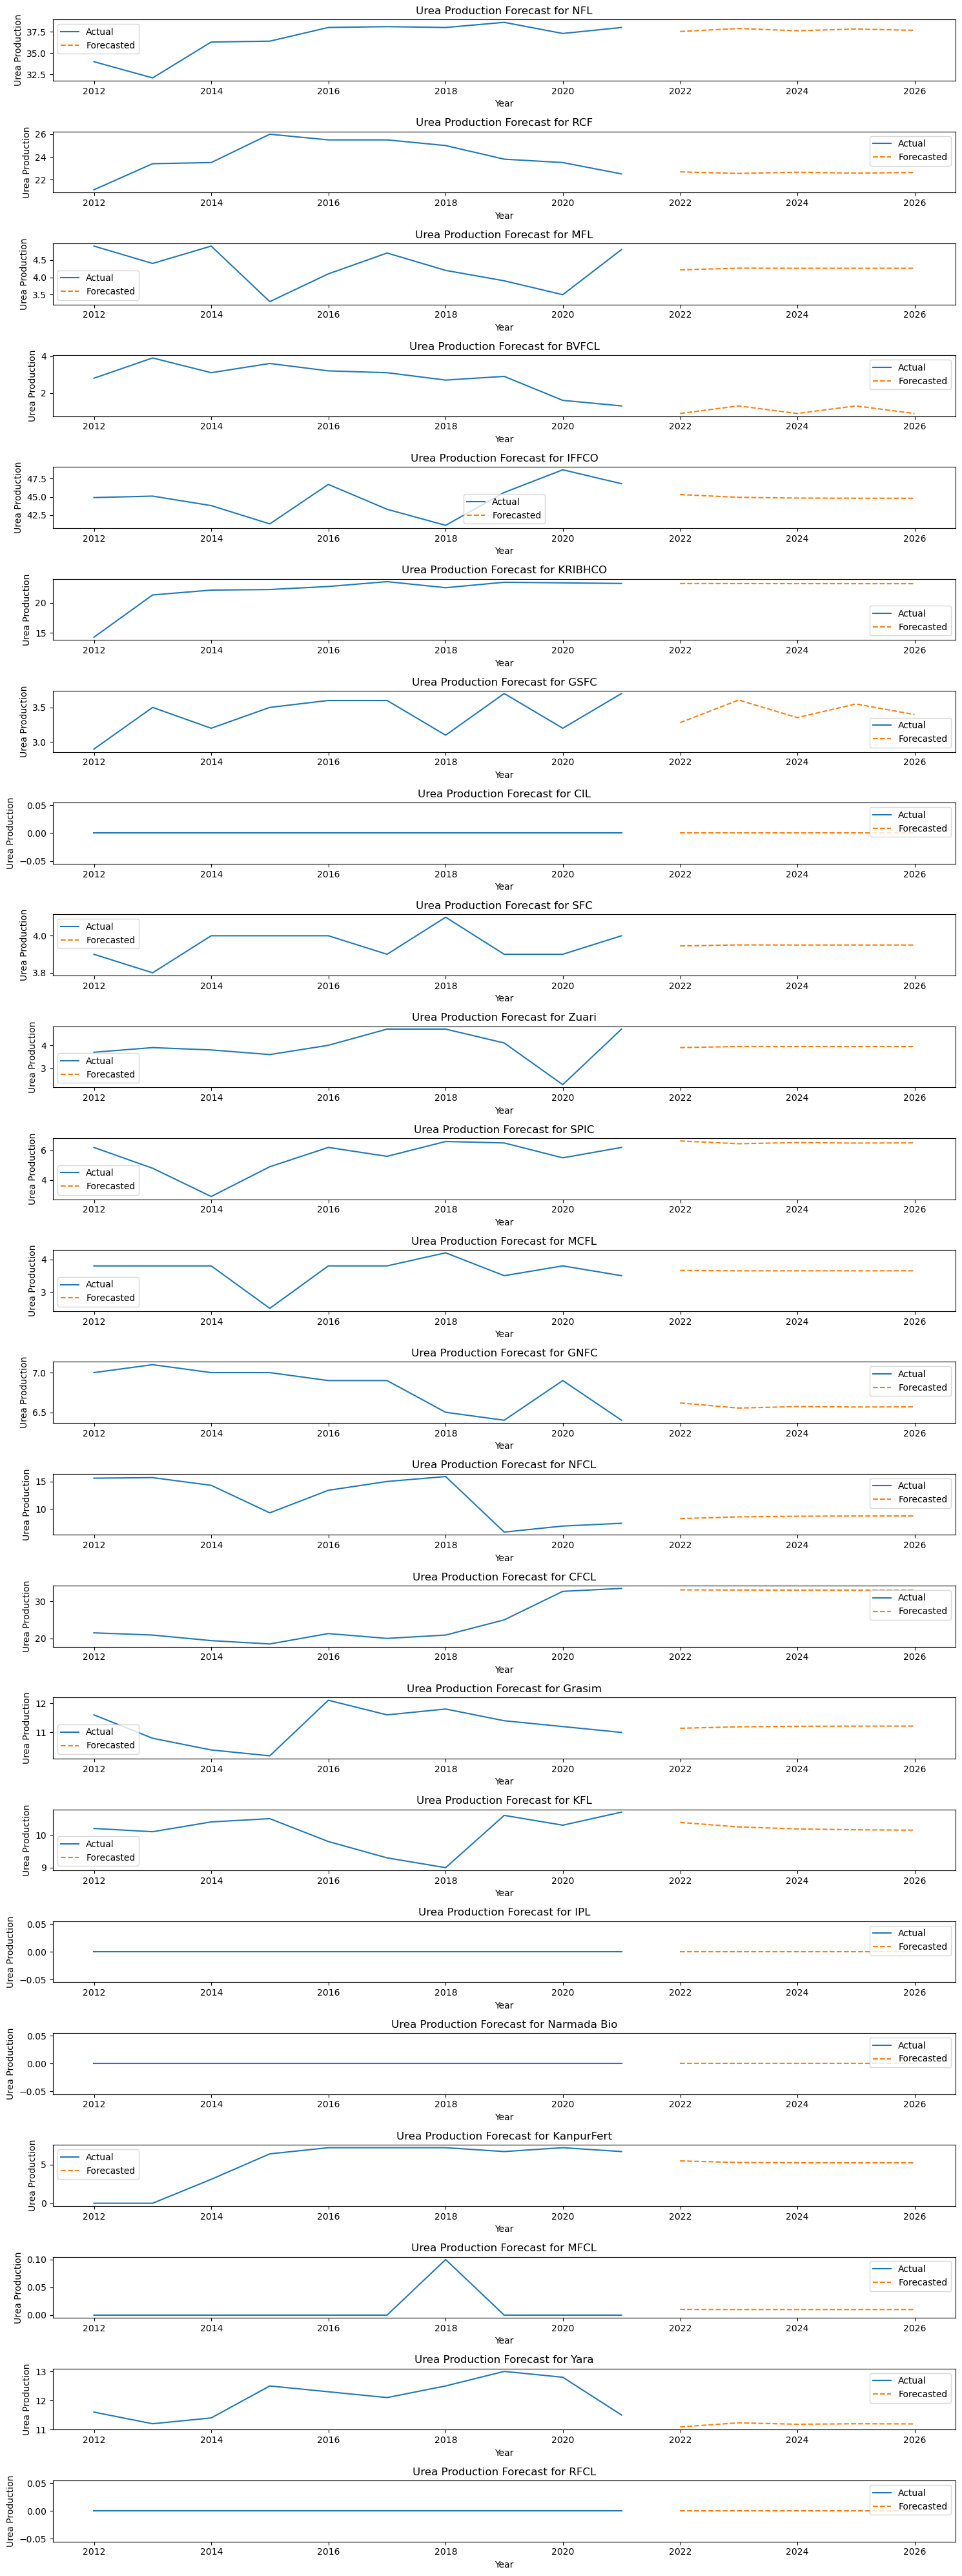

In [12]:
# Example: Plot actual vs. predicted for a specific company (e.g., 'NFL')
plt.figure(figsize=(15, 40))
num_companies = len(df.columns)
for i, company in enumerate(df.columns):
    plt.subplot(num_companies, 1, i + 1)
    plt.plot(df.index, df[company], label='Actual')
    plt.plot(forecasts.index, forecasts[company], label='Forecasted', linestyle='--')
    plt.xlabel('Year')
    plt.ylabel('Urea Production')
    plt.title(f"Urea Production Forecast for {company}")
    plt.legend()

plt.tight_layout()
plt.show()